In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2024-05-29 13:18:48.977345: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import tensorflow as tf
#gpu_available = tf.test.is_gpu_available()
#gpu_available

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
masks = C.Helper.load_seg_data(CAPATH)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13274, 512, 512, 1) (13274, 512, 512, 1) (3492, 512, 512, 1) (3492, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13274, 512, 512, 1) (3492, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13274, 512, 512, 1) (3492, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-05-29 13:22:24.932045: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-29 13:22:25.173604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-29 13:22:25.176260: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-05-29 13:22:25.176734: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-29 13:22:25.200774: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-29 

In [16]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-05-29 13:22:28.452483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-29 13:22:28.474818: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-05-29 13:22:30.109332: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-29 13:22:31.170580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-05-29 13:22:32.452345: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-05-29 13:22:32.452369: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-05-29 13:22:32.452825: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-05-29 13:22:32.543957: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-29 13:22:33.687625: I tensorflow/stream_exec

668/668 [==============================] - 317s 453ms/step - loss: 0.0890 - iou: 3.6460e-05 - iou_thresholded: 0.3367 - val_loss: 0.0031 - val_iou: 1.0587e-04 - val_iou_thresholded: 0.8773
Epoch 2/200
668/668 [==============================] - 306s 448ms/step - loss: 0.0015 - iou: 2.3904e-04 - iou_thresholded: 0.4996 - val_loss: 8.0181e-04 - val_iou: 3.3298e-04 - val_iou_thresholded: 0.8832
Epoch 3/200
668/668 [==============================] - 299s 448ms/step - loss: 5.1151e-04 - iou: 8.2857e-04 - iou_thresholded: 0.4817 - val_loss: 4.7079e-04 - val_iou: 7.7428e-04 - val_iou_thresholded: 0.8832
Epoch 4/200
668/668 [==============================] - 300s 449ms/step - loss: 3.9162e-04 - iou: 0.0013 - iou_thresholded: 0.5040 - val_loss: 2.4674e-04 - val_iou: 0.0014 - val_iou_thresholded: 0.8832
Epoch 5/200
668/668 [==============================] - 299s 448ms/step - loss: 1.7658e-04 - iou: 0.0021 - iou_thresholded: 0.5279 - val_loss: 1.7559e-04 - val_iou: 0.0024 - val_iou_thresholded: 0.

668/668 [==============================] - 299s 448ms/step - loss: 1.0758e-05 - iou: 0.2963 - iou_thresholded: 0.6840 - val_loss: 6.4676e-05 - val_iou: 0.5116 - val_iou_thresholded: 0.8288
Epoch 42/200
668/668 [==============================] - 299s 448ms/step - loss: 1.0752e-05 - iou: 0.3305 - iou_thresholded: 0.6889 - val_loss: 7.6677e-05 - val_iou: 0.5675 - val_iou_thresholded: 0.8576
Epoch 43/200
668/668 [==============================] - 300s 449ms/step - loss: 1.0514e-05 - iou: 0.3298 - iou_thresholded: 0.7019 - val_loss: 7.4084e-05 - val_iou: 0.5017 - val_iou_thresholded: 0.8379
Epoch 44/200
668/668 [==============================] - 300s 448ms/step - loss: 1.0676e-05 - iou: 0.3480 - iou_thresholded: 0.7038 - val_loss: 9.6578e-05 - val_iou: 0.4538 - val_iou_thresholded: 0.7390
Epoch 45/200
668/668 [==============================] - 299s 448ms/step - loss: 1.0032e-05 - iou: 0.3396 - iou_thresholded: 0.7061 - val_loss: 6.7002e-05 - val_iou: 0.4996 - val_iou_thresholded: 0.8580
Epo

Epoch 82/200
668/668 [==============================] - 299s 448ms/step - loss: 5.0455e-06 - iou: 0.5997 - iou_thresholded: 0.8462 - val_loss: 8.6333e-05 - val_iou: 0.7064 - val_iou_thresholded: 0.8617
Epoch 83/200
668/668 [==============================] - 299s 448ms/step - loss: 5.0481e-06 - iou: 0.6048 - iou_thresholded: 0.8309 - val_loss: 8.8603e-05 - val_iou: 0.6574 - val_iou_thresholded: 0.8491
Epoch 84/200
668/668 [==============================] - 300s 448ms/step - loss: 5.3505e-06 - iou: 0.5835 - iou_thresholded: 0.8329 - val_loss: 7.9415e-05 - val_iou: 0.6078 - val_iou_thresholded: 0.8368
Epoch 85/200
668/668 [==============================] - 300s 449ms/step - loss: 5.5433e-06 - iou: 0.5841 - iou_thresholded: 0.8316 - val_loss: 8.5222e-05 - val_iou: 0.6958 - val_iou_thresholded: 0.8526
Epoch 86/200
668/668 [==============================] - 299s 448ms/step - loss: 4.8578e-06 - iou: 0.6062 - iou_thresholded: 0.8279 - val_loss: 8.5415e-05 - val_iou: 0.6854 - val_iou_thresholde

668/668 [==============================] - 299s 448ms/step - loss: 3.8969e-06 - iou: 0.7180 - iou_thresholded: 0.8700 - val_loss: 9.6030e-05 - val_iou: 0.6866 - val_iou_thresholded: 0.8469
Epoch 123/200
668/668 [==============================] - 299s 448ms/step - loss: 3.6805e-06 - iou: 0.7209 - iou_thresholded: 0.8746 - val_loss: 1.0102e-04 - val_iou: 0.7478 - val_iou_thresholded: 0.8664
Epoch 124/200
668/668 [==============================] - 299s 448ms/step - loss: 3.0475e-06 - iou: 0.7421 - iou_thresholded: 0.8831 - val_loss: 9.9643e-05 - val_iou: 0.7212 - val_iou_thresholded: 0.8642
Epoch 125/200
668/668 [==============================] - 299s 448ms/step - loss: 4.1965e-06 - iou: 0.7111 - iou_thresholded: 0.8740 - val_loss: 1.0466e-04 - val_iou: 0.7590 - val_iou_thresholded: 0.8636
Epoch 126/200
668/668 [==============================] - 299s 448ms/step - loss: 3.6605e-06 - iou: 0.6994 - iou_thresholded: 0.8742 - val_loss: 9.7927e-05 - val_iou: 0.7064 - val_iou_thresholded: 0.8338

668/668 [==============================] - 300s 449ms/step - loss: 2.4712e-06 - iou: 0.8038 - iou_thresholded: 0.9120 - val_loss: 1.4877e-04 - val_iou: 0.7559 - val_iou_thresholded: 0.8509
Epoch 163/200
668/668 [==============================] - 299s 448ms/step - loss: 2.5401e-06 - iou: 0.8210 - iou_thresholded: 0.9133 - val_loss: 1.4106e-04 - val_iou: 0.7845 - val_iou_thresholded: 0.8587
Epoch 164/200
668/668 [==============================] - 299s 448ms/step - loss: 2.7971e-06 - iou: 0.7952 - iou_thresholded: 0.9082 - val_loss: 1.4287e-04 - val_iou: 0.7568 - val_iou_thresholded: 0.8574
Epoch 165/200
668/668 [==============================] - 299s 448ms/step - loss: 2.8330e-06 - iou: 0.7925 - iou_thresholded: 0.9056 - val_loss: 1.3726e-04 - val_iou: 0.7770 - val_iou_thresholded: 0.8610
Epoch 166/200
668/668 [==============================] - 299s 448ms/step - loss: 2.4255e-06 - iou: 0.8214 - iou_thresholded: 0.9156 - val_loss: 1.3257e-04 - val_iou: 0.7952 - val_iou_thresholded: 0.8629

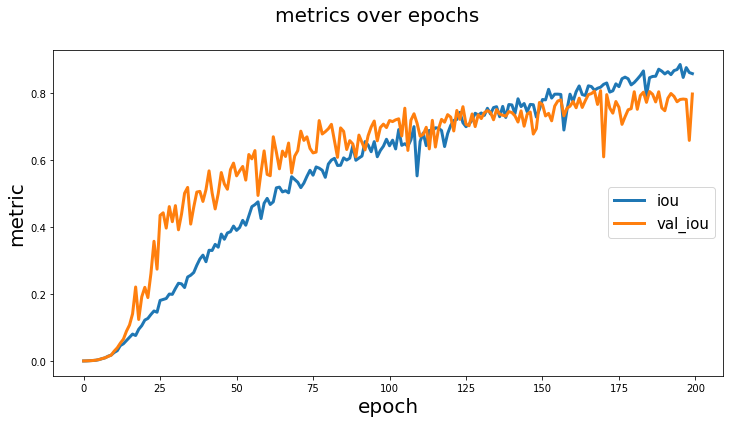

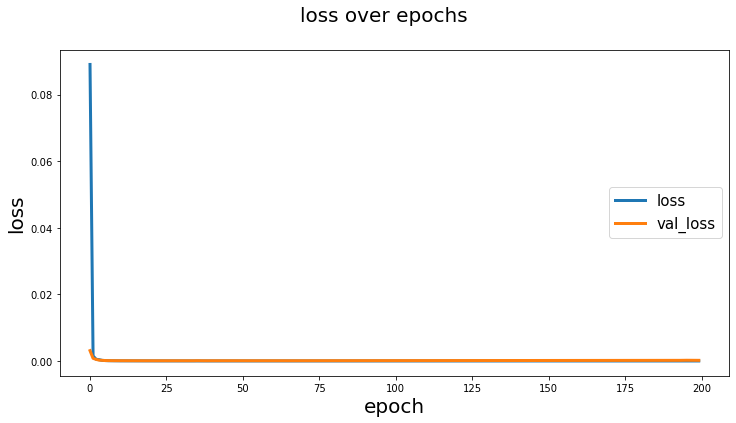

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(test_images_array, model)

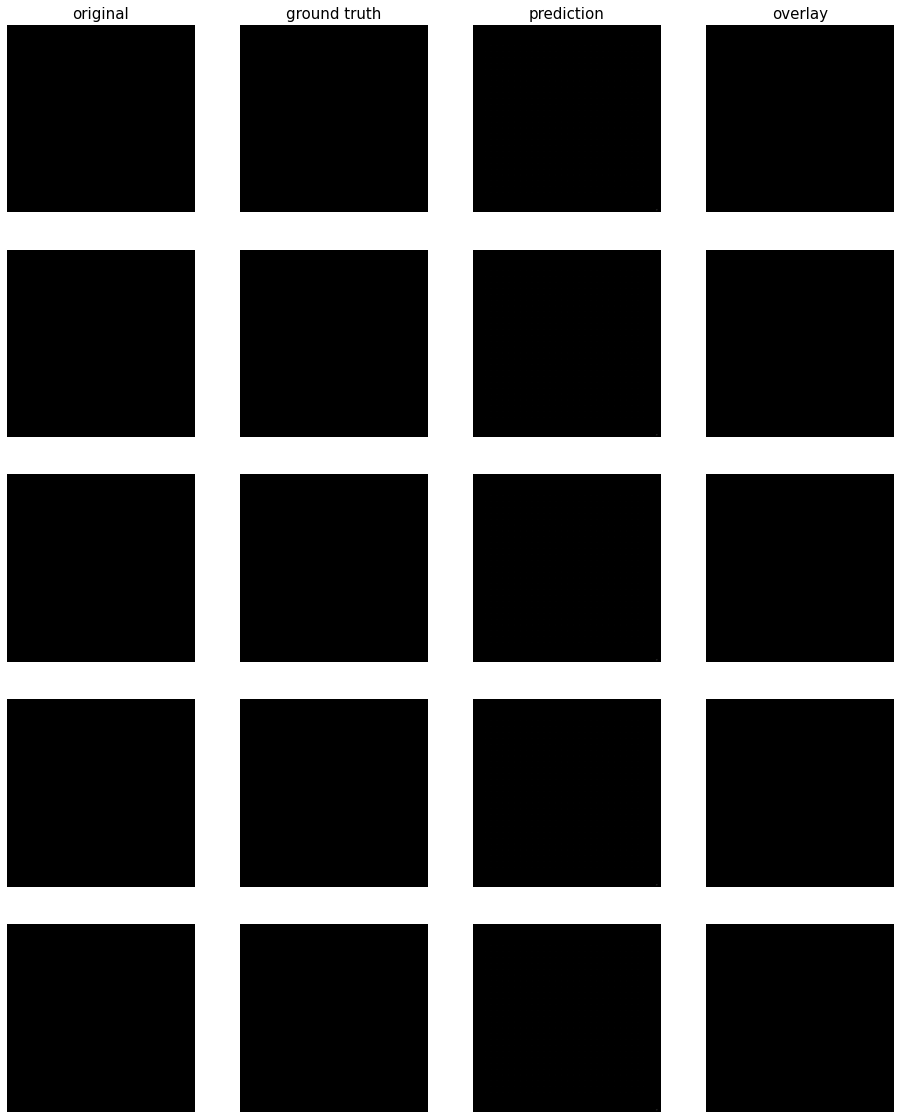

In [19]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

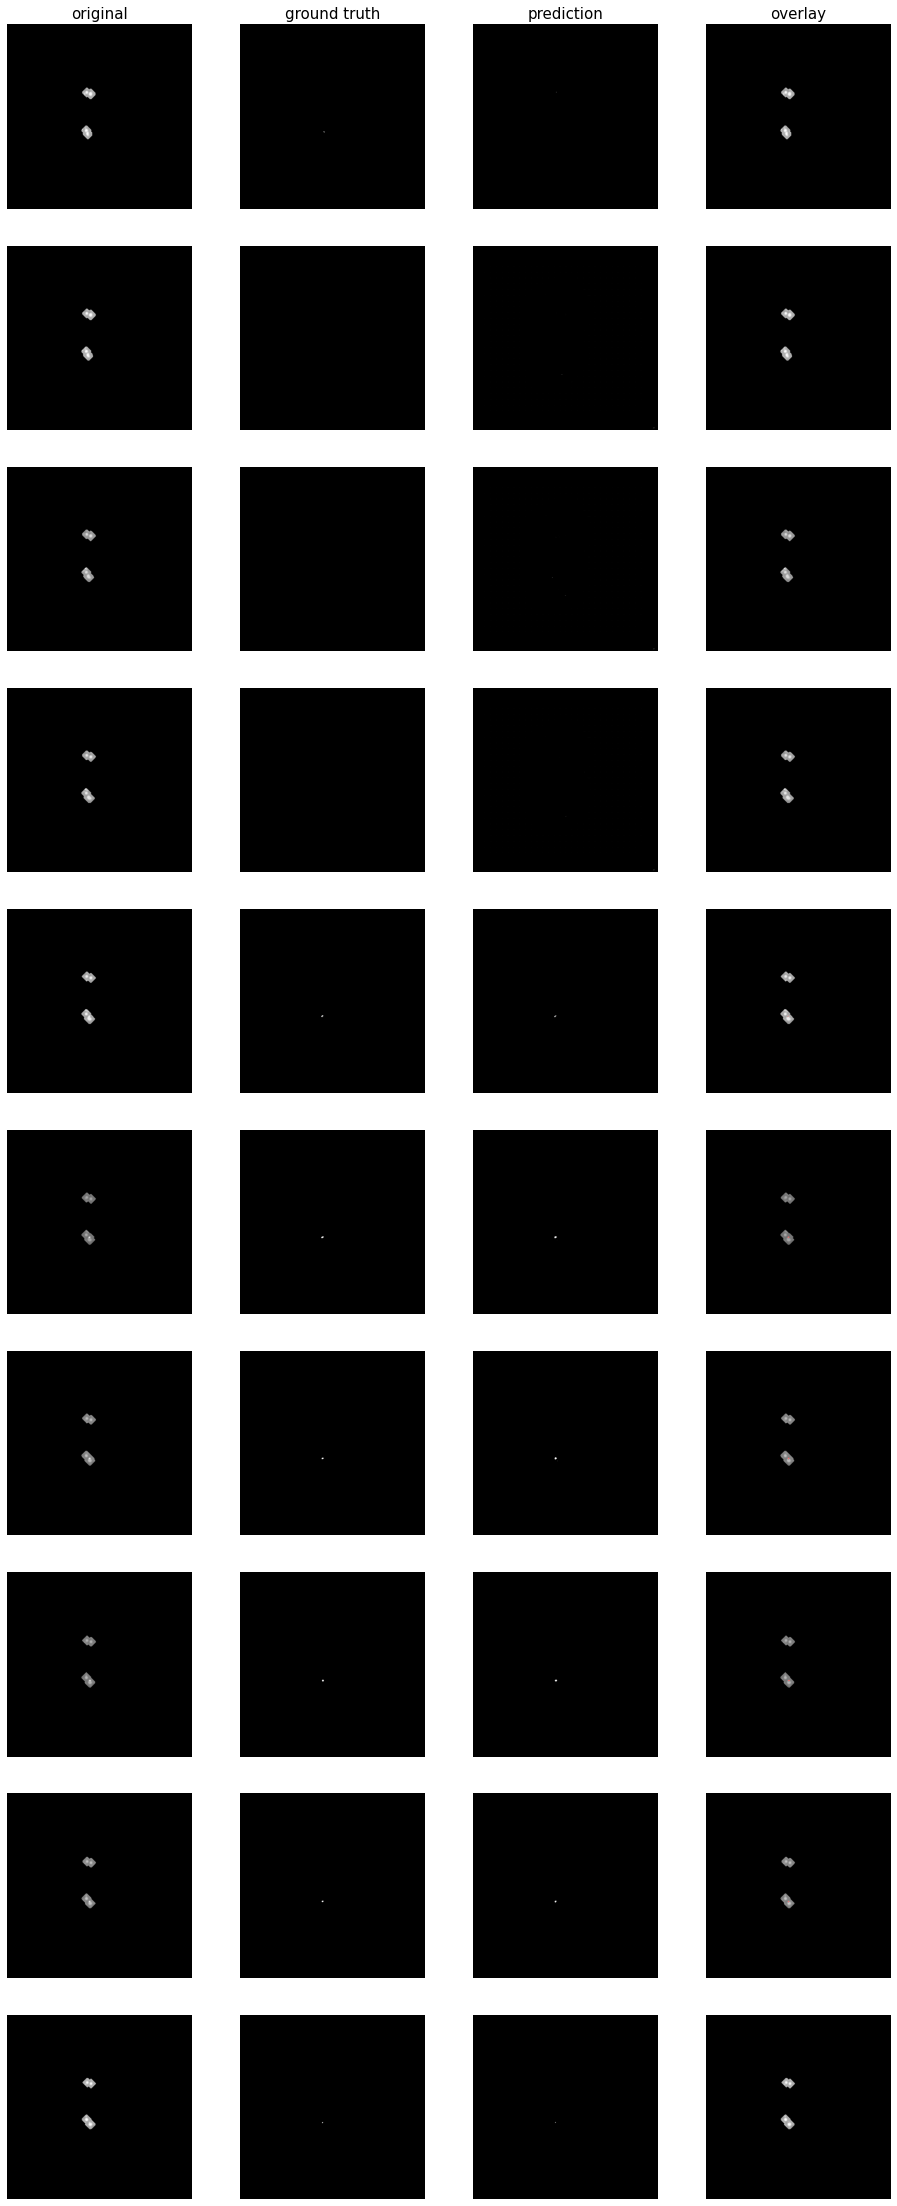

In [38]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=120, end_index=130)

In [21]:
C.Helper.evaluate(test_images_array, y_test, model)

110/110 [==============================] - 28s 253ms/step - loss: 1.1057e-04 - iou: 0.7229 - iou_thresholded: 0.8089


In [22]:
import pickle

In [23]:
with open('predictions_unet_v24.pkl', 'wb') as f:
    pickle.dump(y_pred, f)

In [24]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

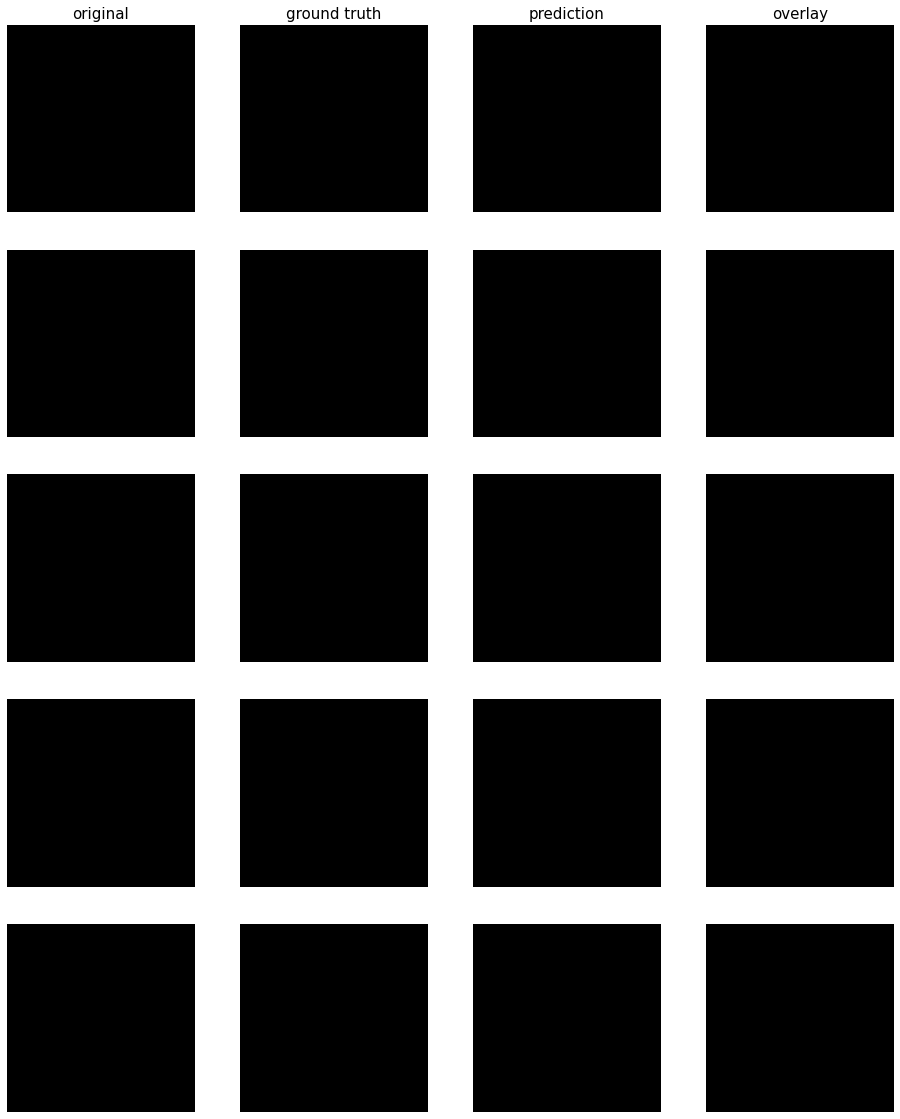

In [25]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

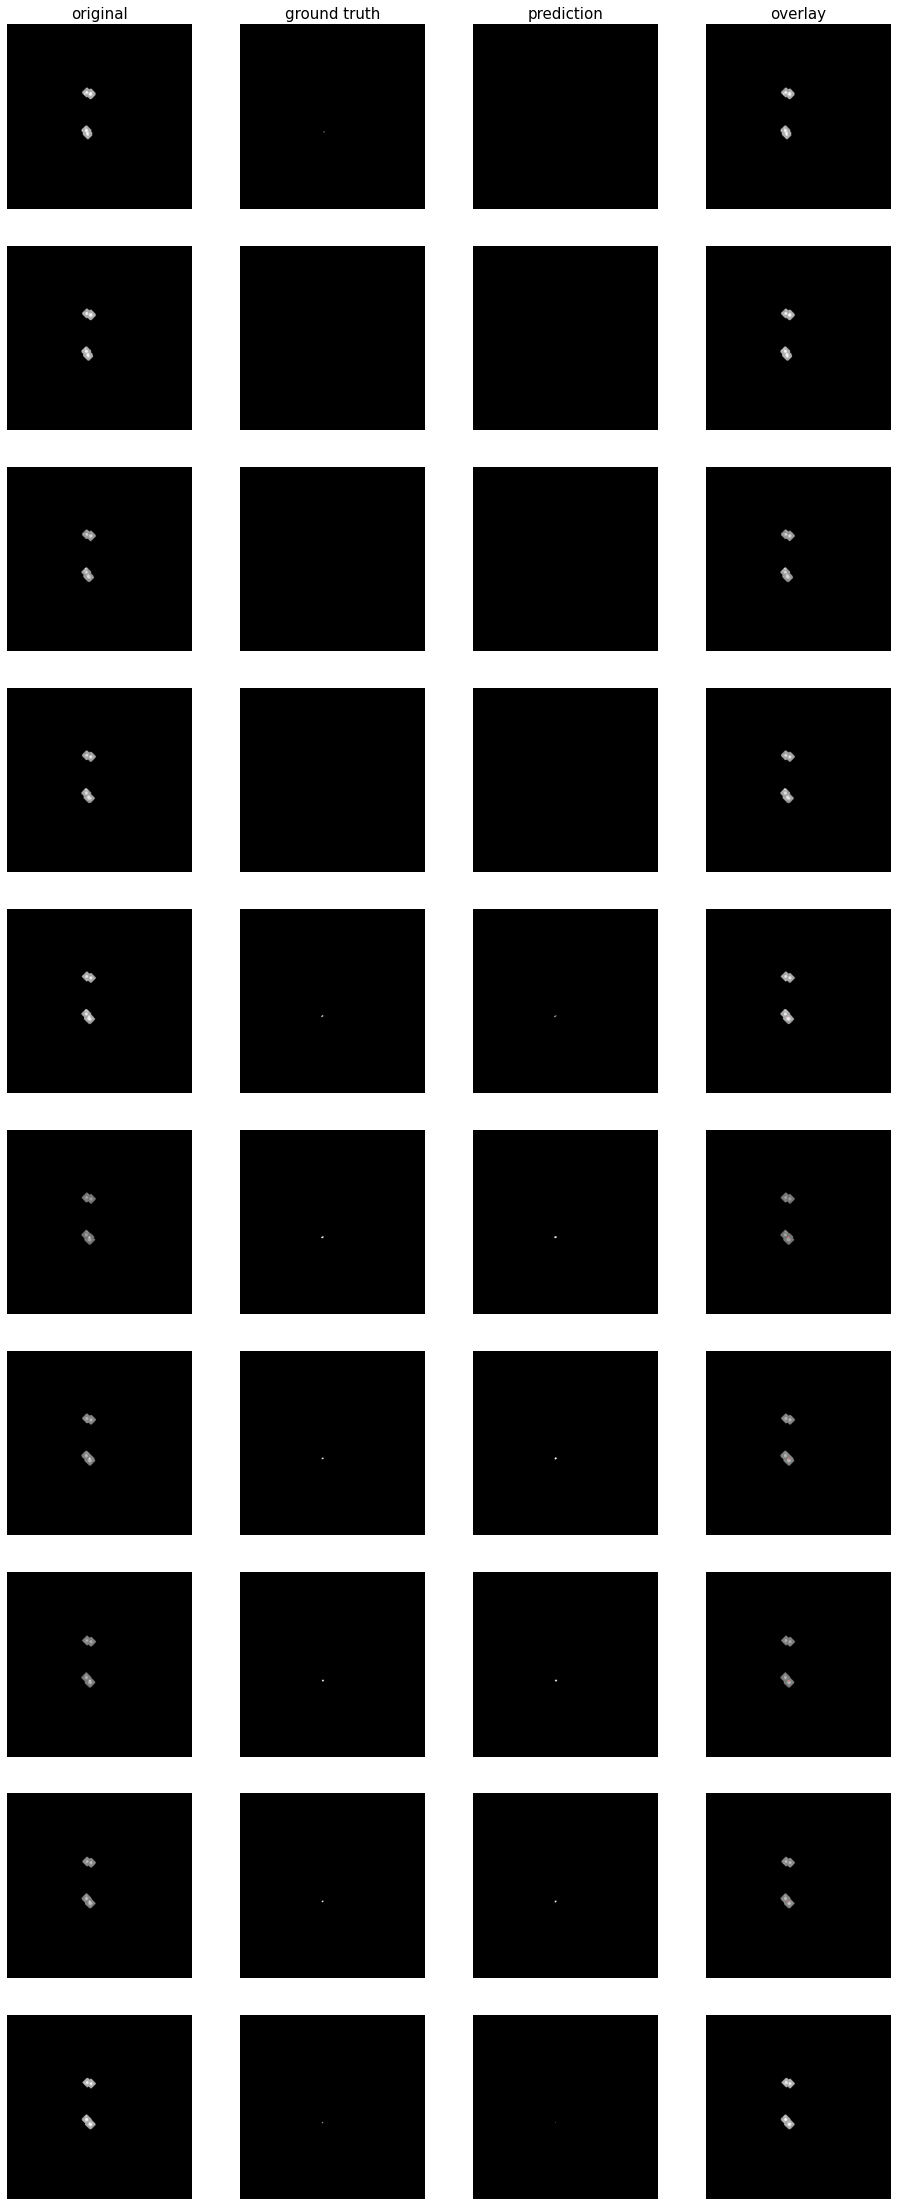

In [39]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=120, end_index=130)

In [27]:
C.Helper.evaluate(test_images_array, a_binary, model)

110/110 [==============================] - 28s 252ms/step - loss: 1.1037e-06 - iou: 0.8560 - iou_thresholded: 1.0000
